In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 4 Kinematical signature
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/KinematicalSignature/'

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff

28843 pairs from MC-BNB + cosmic DATA overlay
18998 pairs in FV
5099 are 1mu-1p, 26.8%
4347 are other pairs, 22.9%
9552 are cosmic, 50.3%
--------------------------------------------------------------
2008 are CC 1p 0pi, 10.6%


In [4]:
pureff_MCbnbDATAcosmic

$\mu p$ eff. $\mu p$ pur. CC$0\pi 1 p$ eff.  \
no cut                       100.0%        26.8%            100.0%   
PIDa                          88.1%        52.2%             86.3%   
flashes                       87.7%        54.8%             86.0%   
flash                         82.9%        57.0%             80.8%   
length                        68.6%        66.6%             70.7%   
non-collinearity              63.2%        71.6%             68.0%   
vertex activity               42.4%        75.2%             58.6%   
delta phi                     29.7%        88.4%             51.7%   
Pt no Delta phi               31.9%        83.3%             52.3%   
soft Pt                       25.8%        91.4%             47.3%   
tight Pt                      13.2%        93.1%             26.7%   
non-collinearity first        90.9%        41.2%             94.8%   
theta_pq                      21.0%        93.0%             42.0%   
l_p_min_10                    16.3%        92.9%             30.3%   
soft Pmiss                    21.8%        92.7%             42.2%   
PIDa-                         90.1%        50.3%             88.7%   
PIDa+                         85.4%        53.6%             84.0%   
theta12-                      61.4%        72.8%             66.8%   
theta12+                      65.2%        70.3%             69.1%   
RdQ-                          40.2%        75.5%             56.3%   
RdQ+                          44.6%        75.0%             59.9%   
delta_phi-                    28.2%        89.4%             50.5%   
delta_phi+                    30.9%        87.8%             52.8%   
Pt-                           24.2%        91.9%             44.8%   
Pt+                           27.0%        90.8%             49.0%   
theta_pq-                     13.9%        93.8%             29.1%   
theta_pq+                     25.0%        92.5%             47.7%   

                       CC$0\pi 1 p$ pur.  \
no cut                             10.6%   
PIDa                               20.2%   
flashes                            21.2%   
flash                              21.9%   
length                             27.0%   
non-collinearity                   30.3%   
vertex activity                    41.0%   
delta phi                          60.7%   
Pt no Delta phi                    53.8%   
soft Pt                            66.1%   
tight Pt                           74.1%   
non-collinearity first             16.9%   
theta_pq                           73.3%   
l_p_min_10                         67.8%   
soft Pmiss                         70.8%   
PIDa-                              19.5%   
PIDa+                              20.7%   
theta12-                           31.2%   
theta12+                           29.4%   
RdQ-                               41.7%   
RdQ+                               39.7%   
delta_phi-                         63.2%   
delta_phi+                         59.0%   
Pt-                                67.1%   
Pt+                                64.9%   
theta_pq-                          77.4%   
theta_pq+                          69.5%   

                                                                    label  \
no cut                                                             no cut   
PIDa                                                         ${PID}_a>12$   
flashes                                                   $N_{flashes}>0$   
flash                                                      optical filter   
length                                                    $l_{\mu}>l_{p}$   
non-collinearity                               $|\theta_{1,2}-90^0|<60^0$   
vertex activity         $\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...   
delta phi                                      $|\Delta \phi - \pi|<40^0$   
Pt no Delta phi                                        $p_{t}<0.35$ GeV/c   
soft Pt                                                $p_{

## 4.I The reconstructed momentum of the muon and the proton candidates

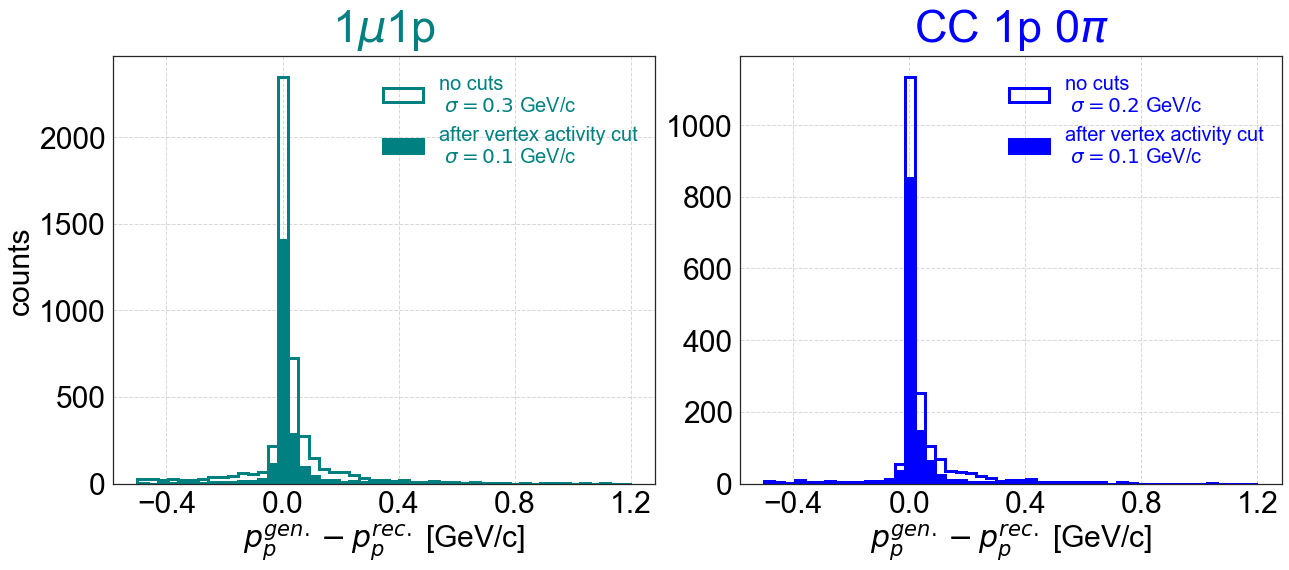

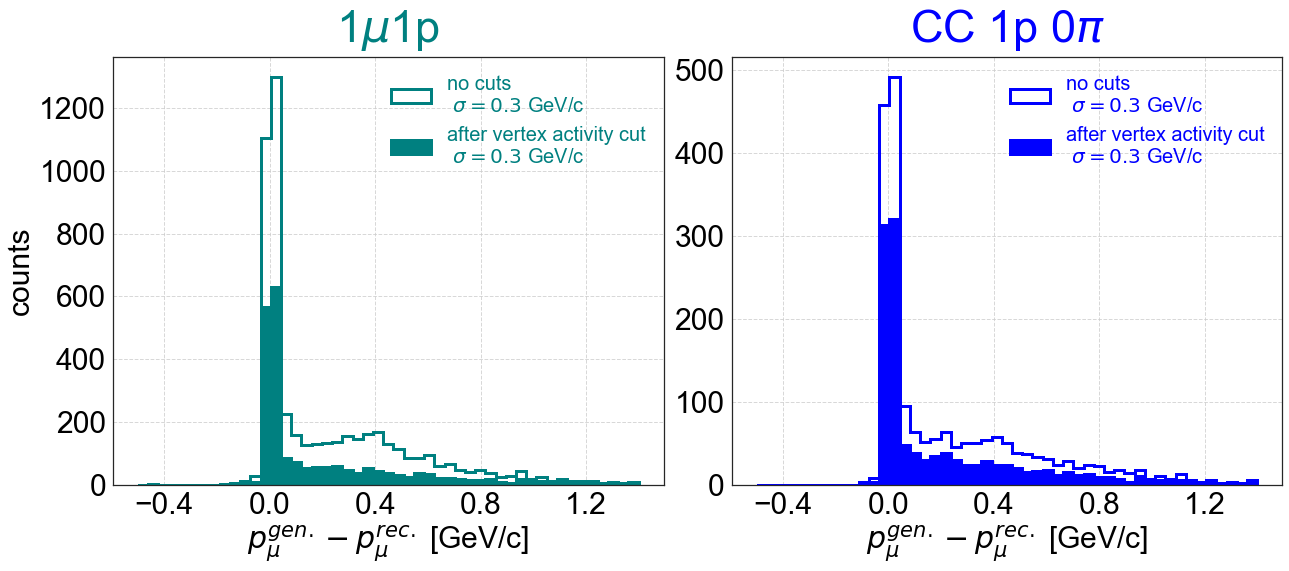

In [17]:
for particle,p_name,xmax in zip(['p','mu'],['p','\\mu'],[1.2,1.4]):
    fig=plt.figure(figsize=(18,8))
    for i,index in enumerate([0,3]):
        pair_type,label,cmap,color = get_pair_hpars(index)
        ax = fig.add_subplot(1,2,i+1)
        ax.set_title(label,fontsize=45,y=1.02,color=color)
        for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after vertex activity cut']):
            sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
            delta = (sample['truth_P'+particle] - sample['reco_P'+particle])
            small_sample = sample[np.abs(sample['truth_P'+particle] - sample['reco_P'+particle])<2]
            delta_small_sample = small_sample['truth_P'+particle] - small_sample['reco_P'+particle]
            sigma = np.std(delta_small_sample)

            h,bins,_=ax.hist(delta,bins=np.linspace(-0.5,xmax,50)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+' GeV/c')                
        set_axes(ax,'$p_{'+p_name+'}^{gen.}-p_{'+p_name+'}^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-0.4,0,0.4,0.8,1.2]
                )
    
        leg = plt.legend(fontsize=20)
        for text in leg.get_texts():
            text.set_color(color)
    plt.tight_layout()
    fig.savefig(figures_path+'recoMomenta/P'+particle+'_gen_reco.pdf')

### 4.II Coplanarity - ∆φ between tracks

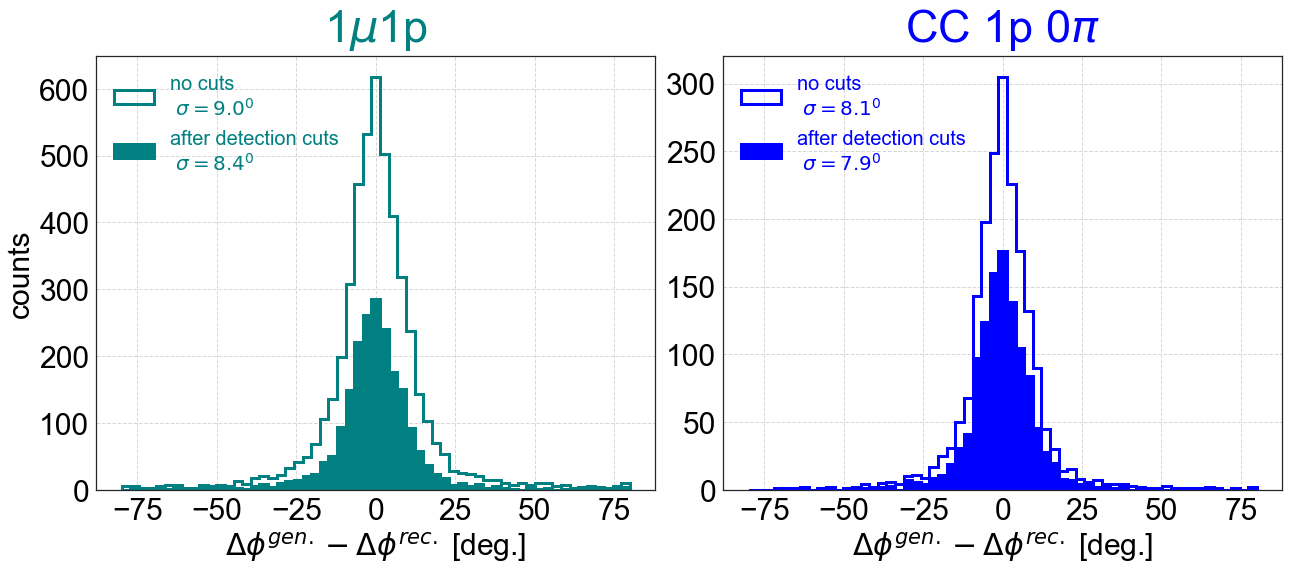

In [7]:
# MC-bnb/DATA-cosmic
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after detection cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
        delta = (sample['truth_delta_phi'] - sample['delta_phi'])
        small_sample = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
        delta_small_sample = (small_sample['truth_delta_phi'] - small_sample['delta_phi'])
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-80,80,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+'$^0$')                
        set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-75,-50,-25,0,25,50,75]
                )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Coplanarity/delta_phi_gen_reco.pdf')

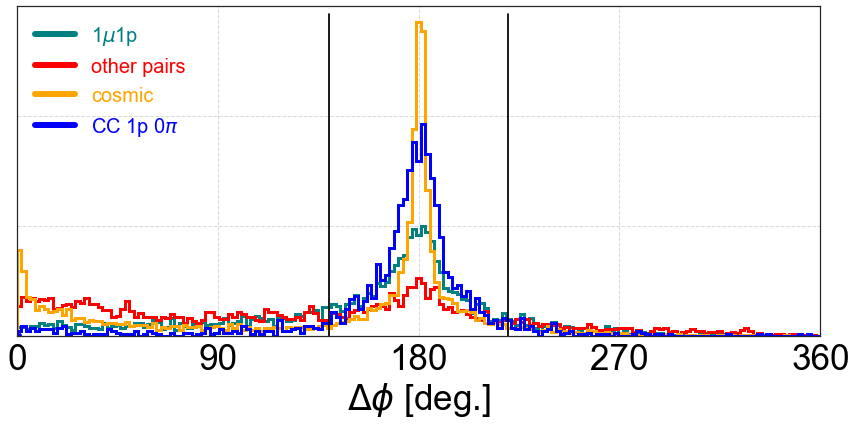

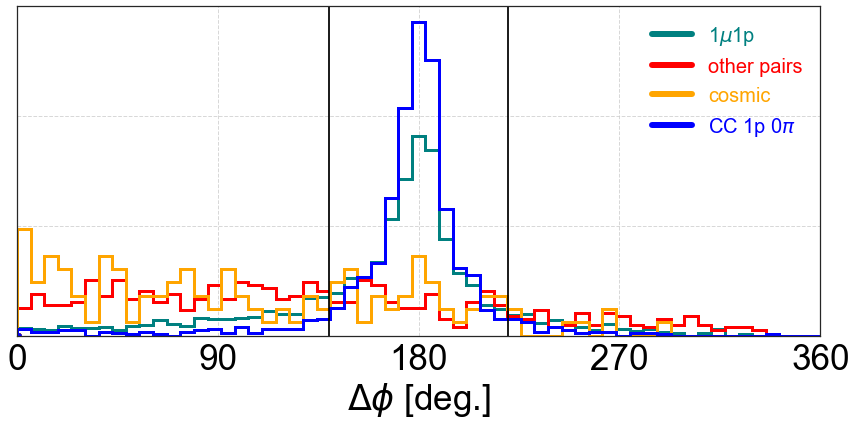

In [8]:
plot_feature_pairs(reduced_samples=reduced_MCbnbDATAcosmicSamples
                   ,cut_name='no cut',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'Coplanarity/DeltaPhi.pdf')

# after cut 4
plot_feature_pairs(reduced_samples=reduced_MCbnbDATAcosmicSamples
                   ,cut_name='vertex activity',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper right'
                              ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'Coplanarity/DeltaPhi_after_cut_VertexActivity.pdf')

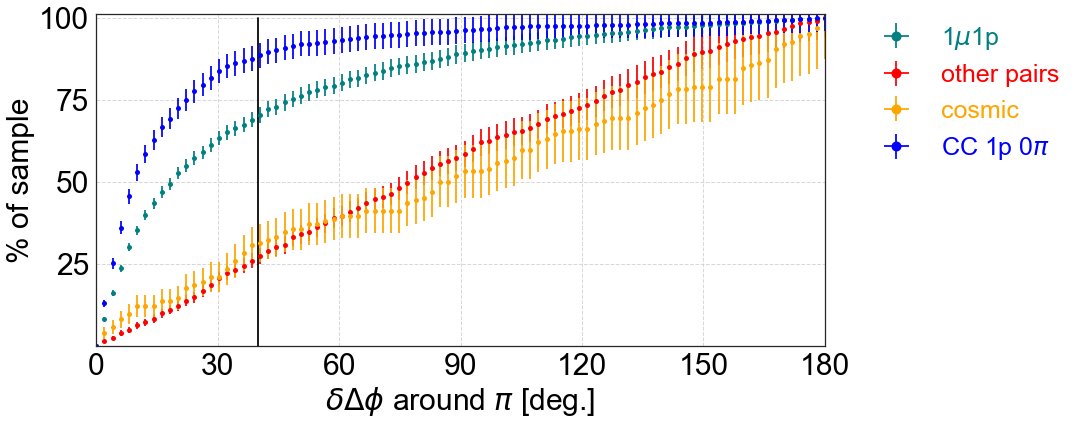

In [9]:
ax,leg=plot_cut_samples(reduced_samples=reduced_MCbnbDATAcosmicSamples
                        ,reduced_cut_name='vertex activity',do_add_legend=True,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6))
plt.plot([40,40],[0,100],'-',color='black')
plt.savefig(figures_path+'Coplanarity/DeltaPhi_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

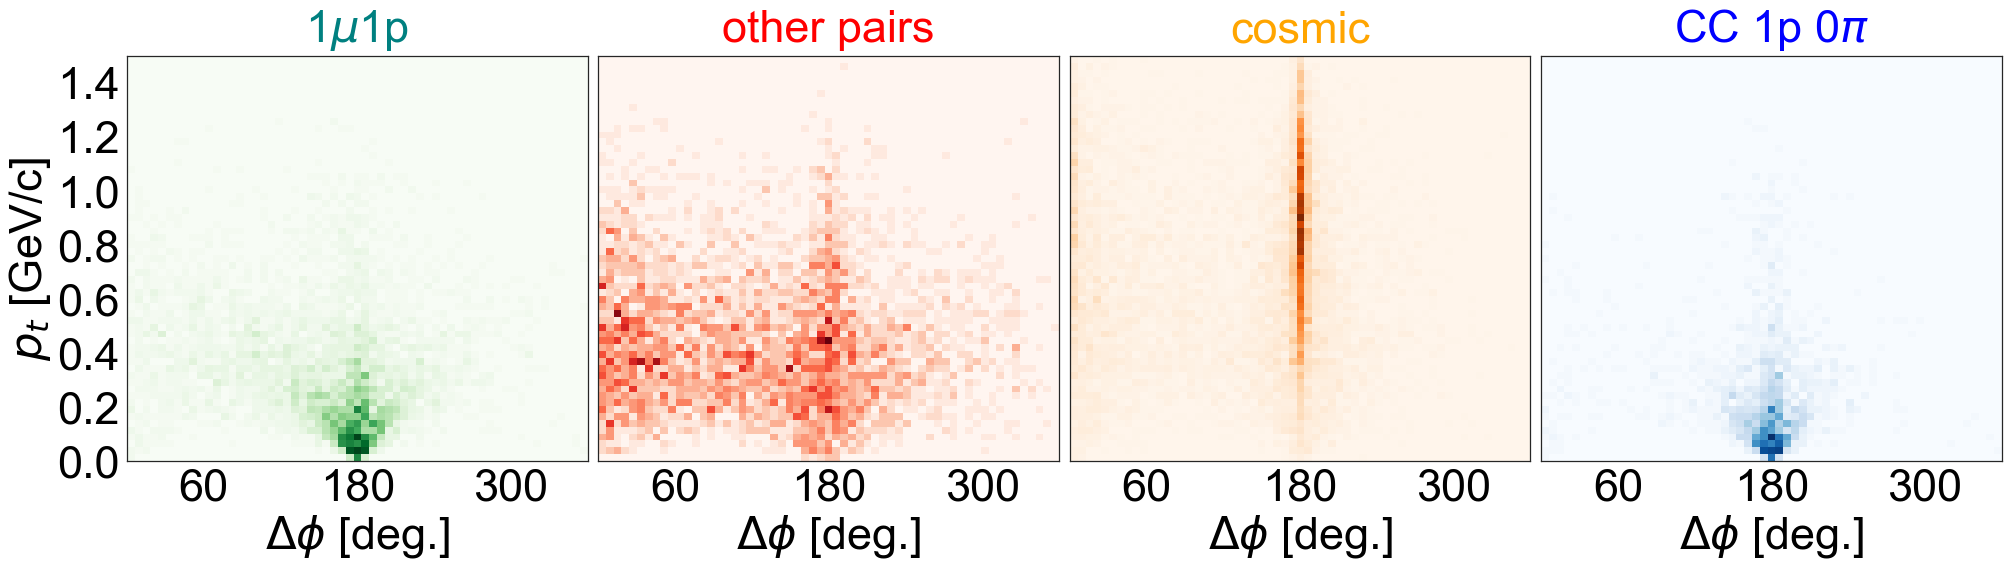

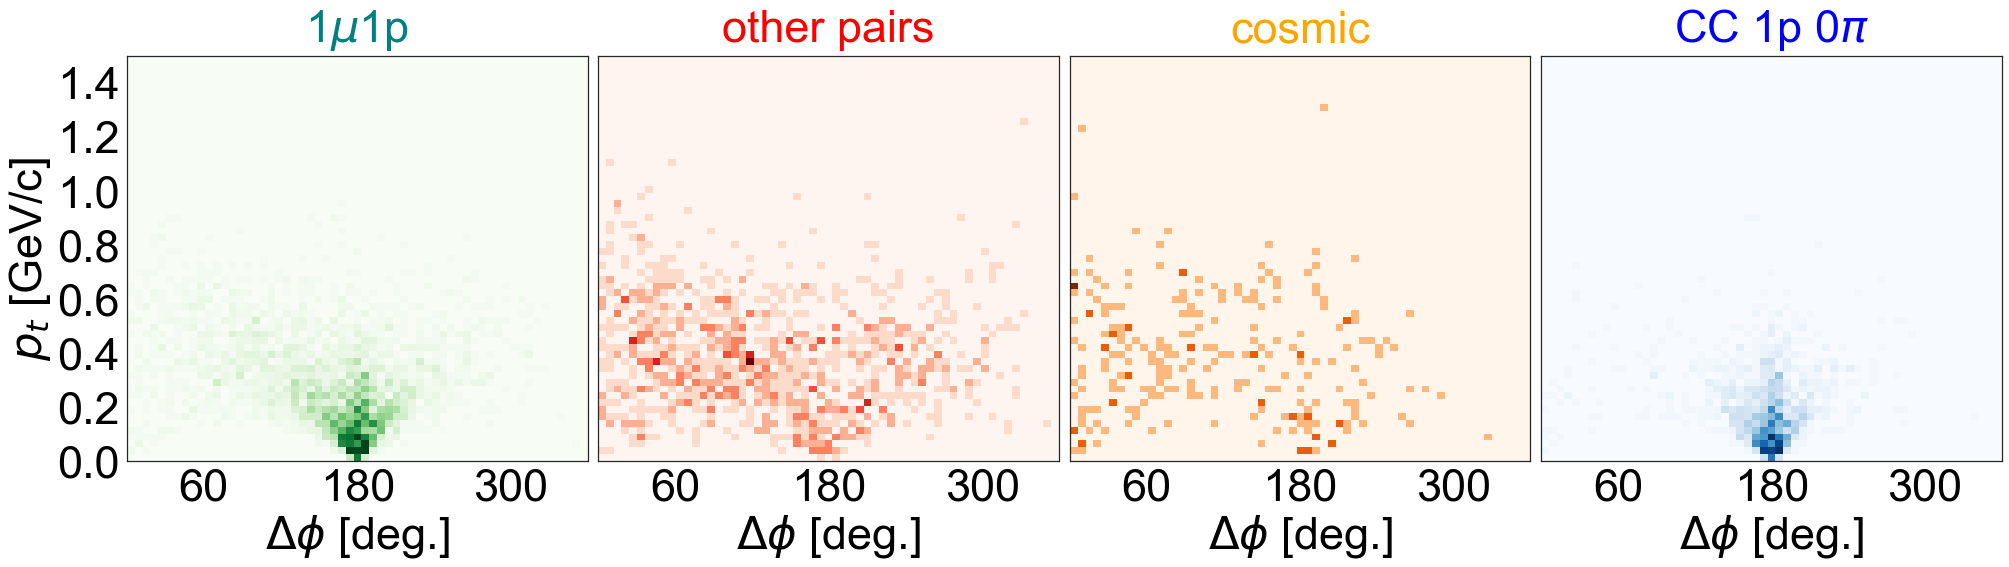

In [10]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,60))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'Coplanarity/DeltaPhi_vs_Pt.pdf')


fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'Coplanarity/DeltaPhi_vs_Pt_after_cut_VertexActivity.pdf')

## Appendix A Reconstructed $\theta (p,q)$

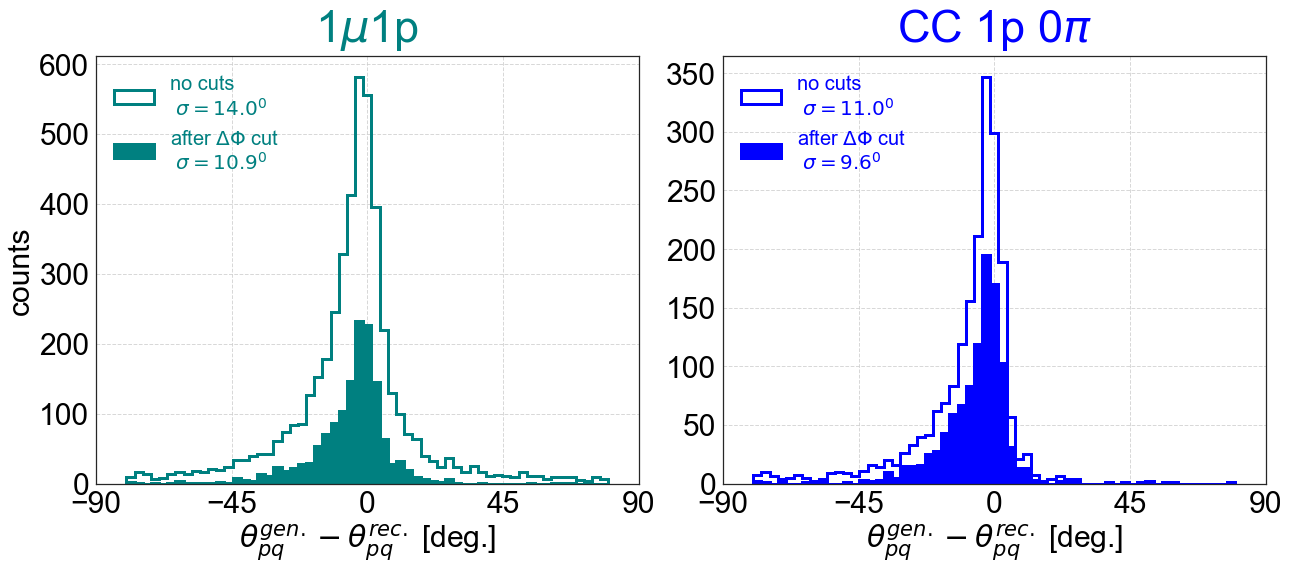

In [11]:
# MC-bnb/DATA-cosmic
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,label in zip(['no cut','delta phi']
                                  ,['no cuts',r'after $\Delta \Phi$ cut']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
        delta = sample['truth_theta_pq']-sample['reco_theta_pq']
        small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_theta_pq'])<45]
        delta_small_sample = small_sample['truth_theta_pq']-small_sample['reco_theta_pq']
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-80,80,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+'$^0$')                
        set_axes(ax,r'$\theta^{gen.}_{pq}-\theta^{rec.}_{pq}$ [deg.]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-90,-45,0,45,90] )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq/theta_pq_gen_reco.pdf')

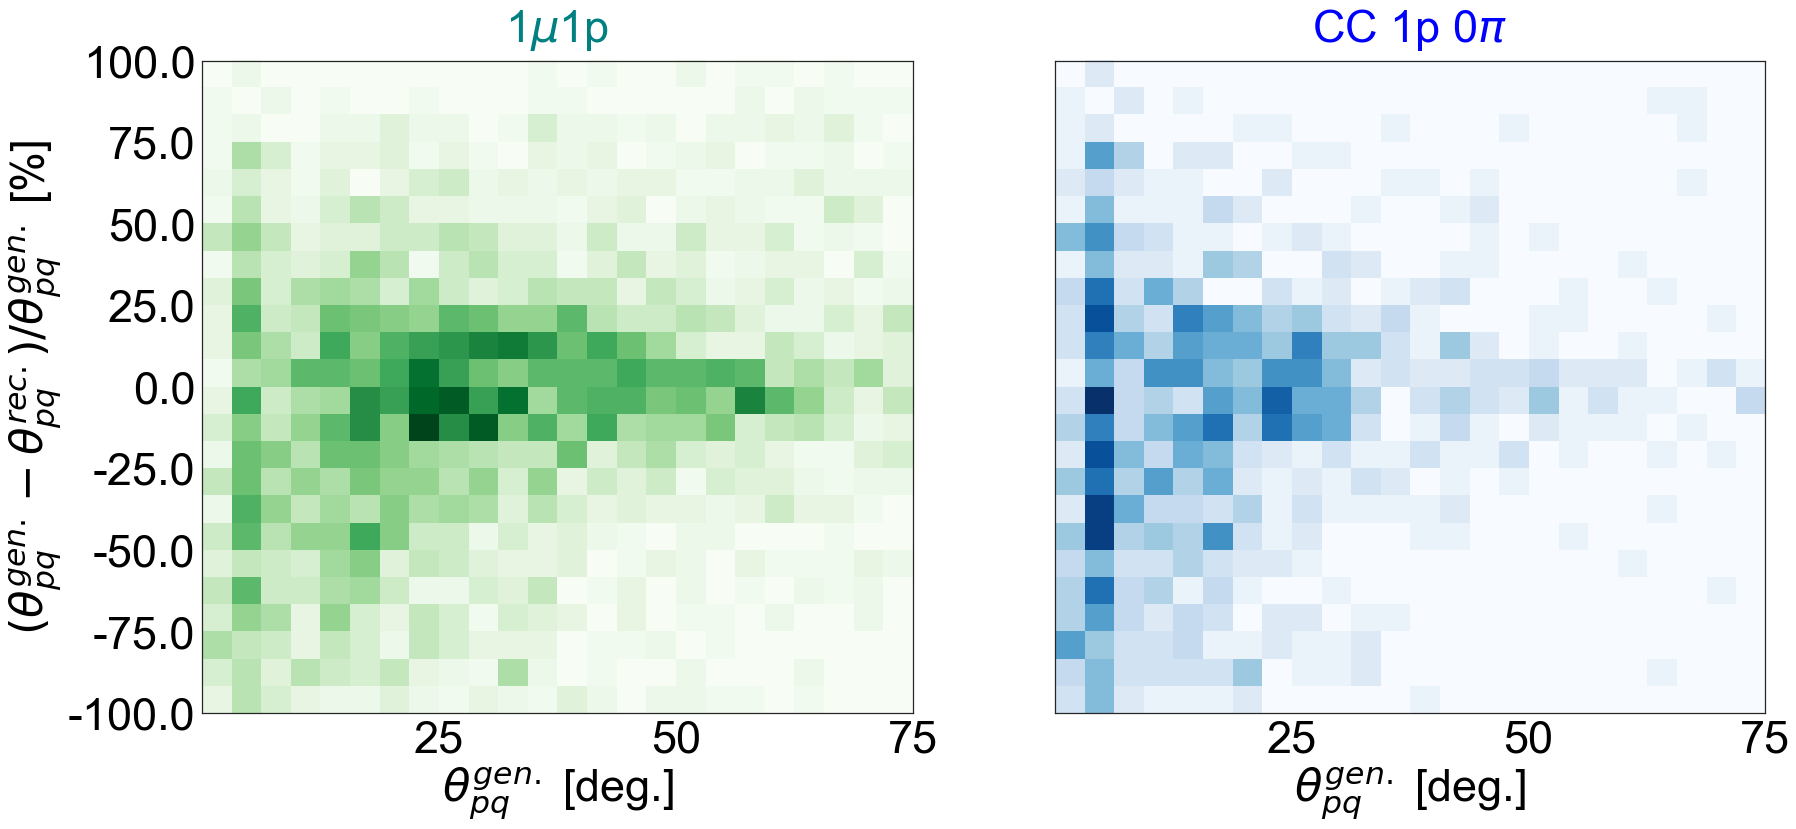

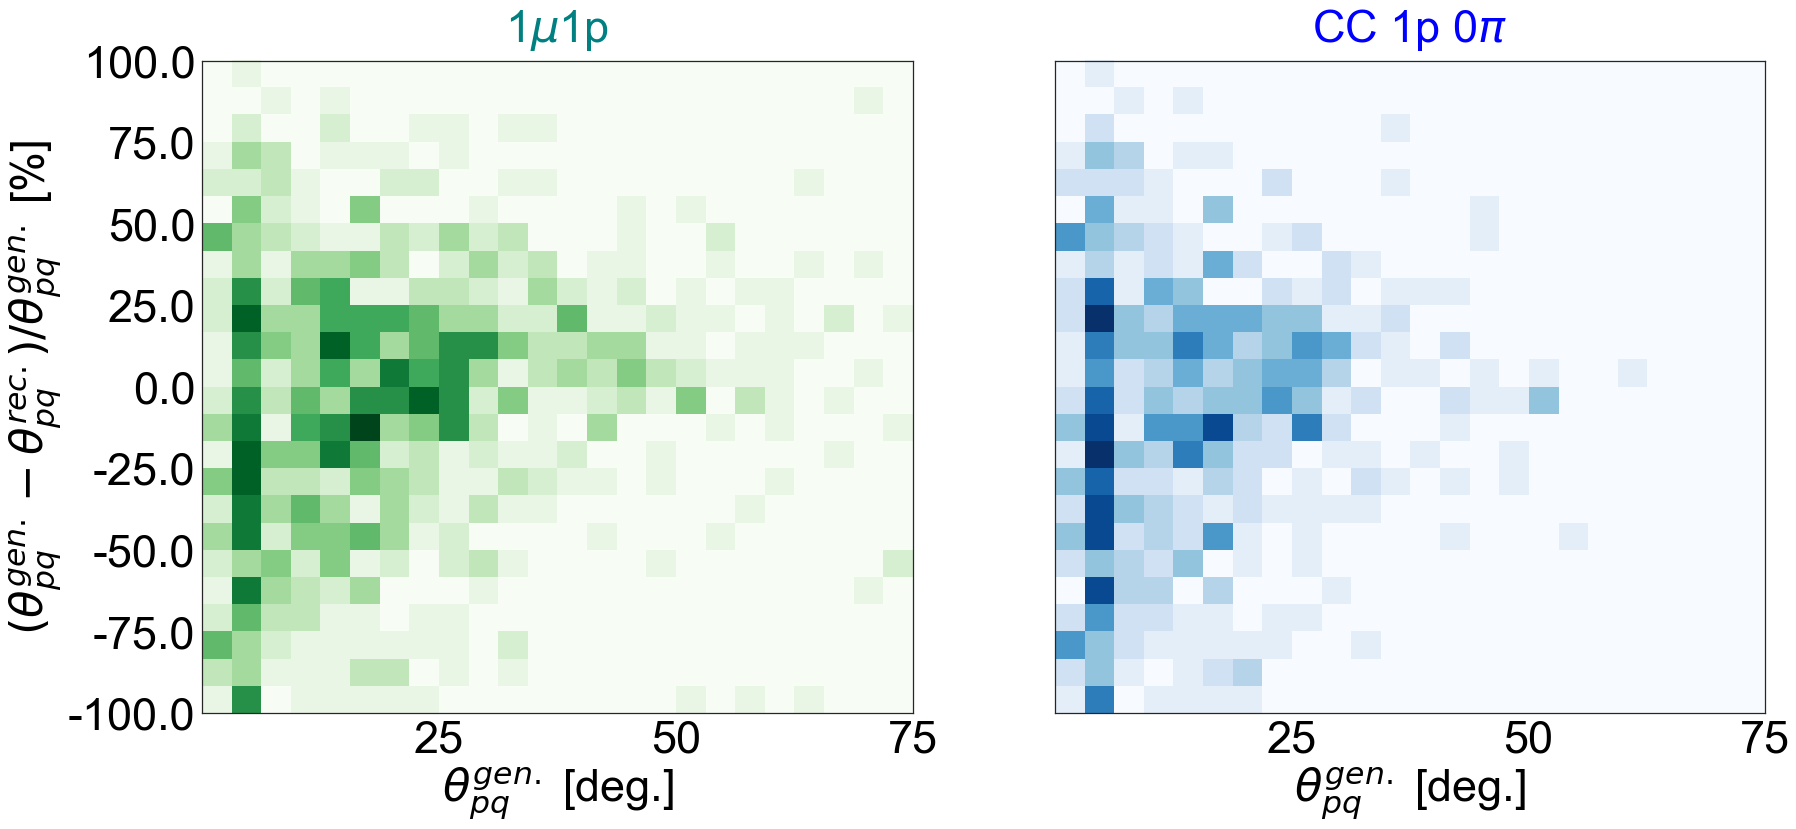

In [12]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,75,25),np.linspace(-100,100,25))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq/theta_pq_reconstruction.pdf')

fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq/theta_pq_reconstruction_after_cut_DeltaPhi.pdf')

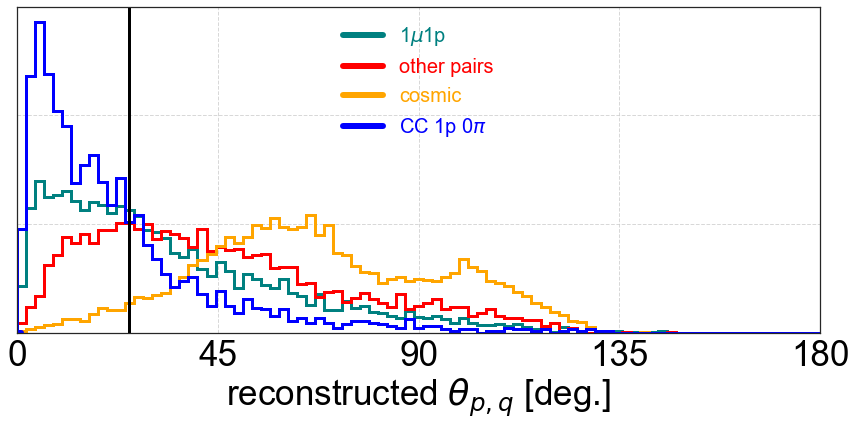

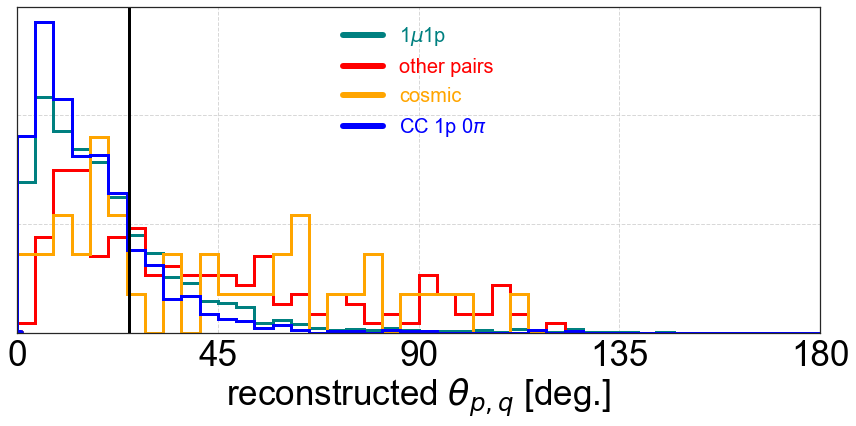

In [13]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq/theta_pq.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='delta phi',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,45)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq/theta_pq_after_cut_DeltaPhi.pdf')

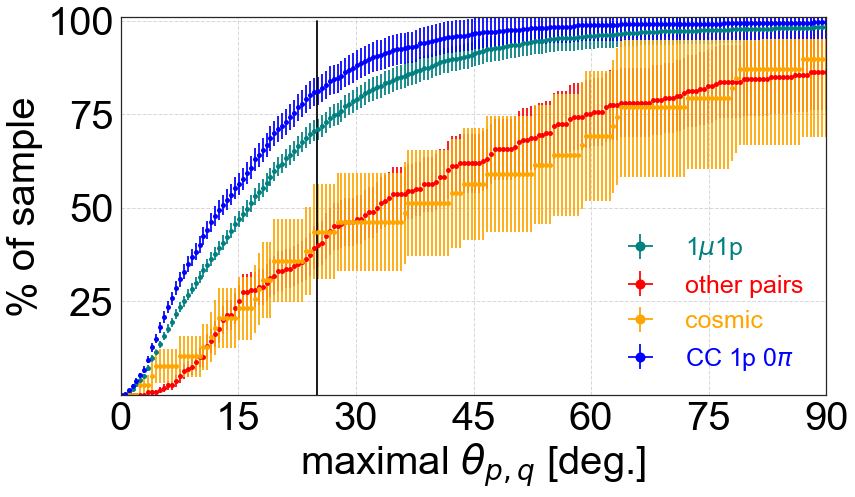

In [14]:
ax,leg=plot_cut_samples(reduced_cut_name='delta phi',do_add_legend=True,legend_fontsize=25,legend_loc='lower right'                    
                 ,cut_var ='reco_theta_pq', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,7));
ax.plot([25,25],[0,100],'-',color='black')
plt.savefig(figures_path+'theta_pq/theta_pq_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

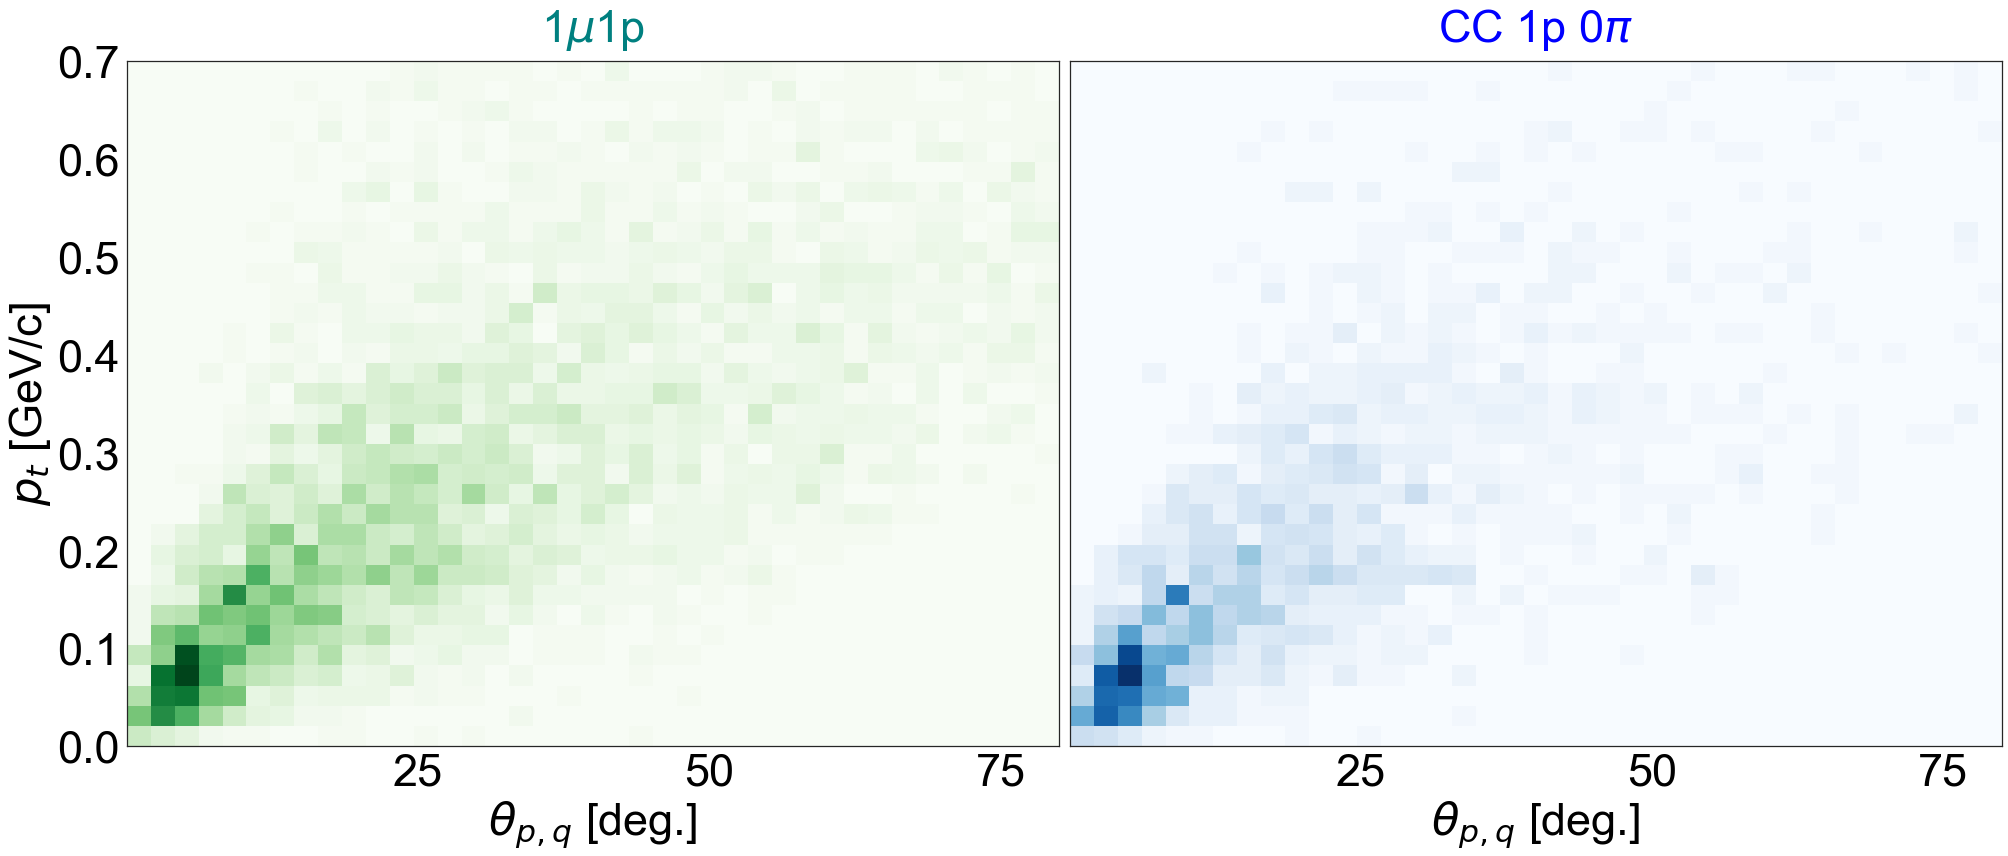

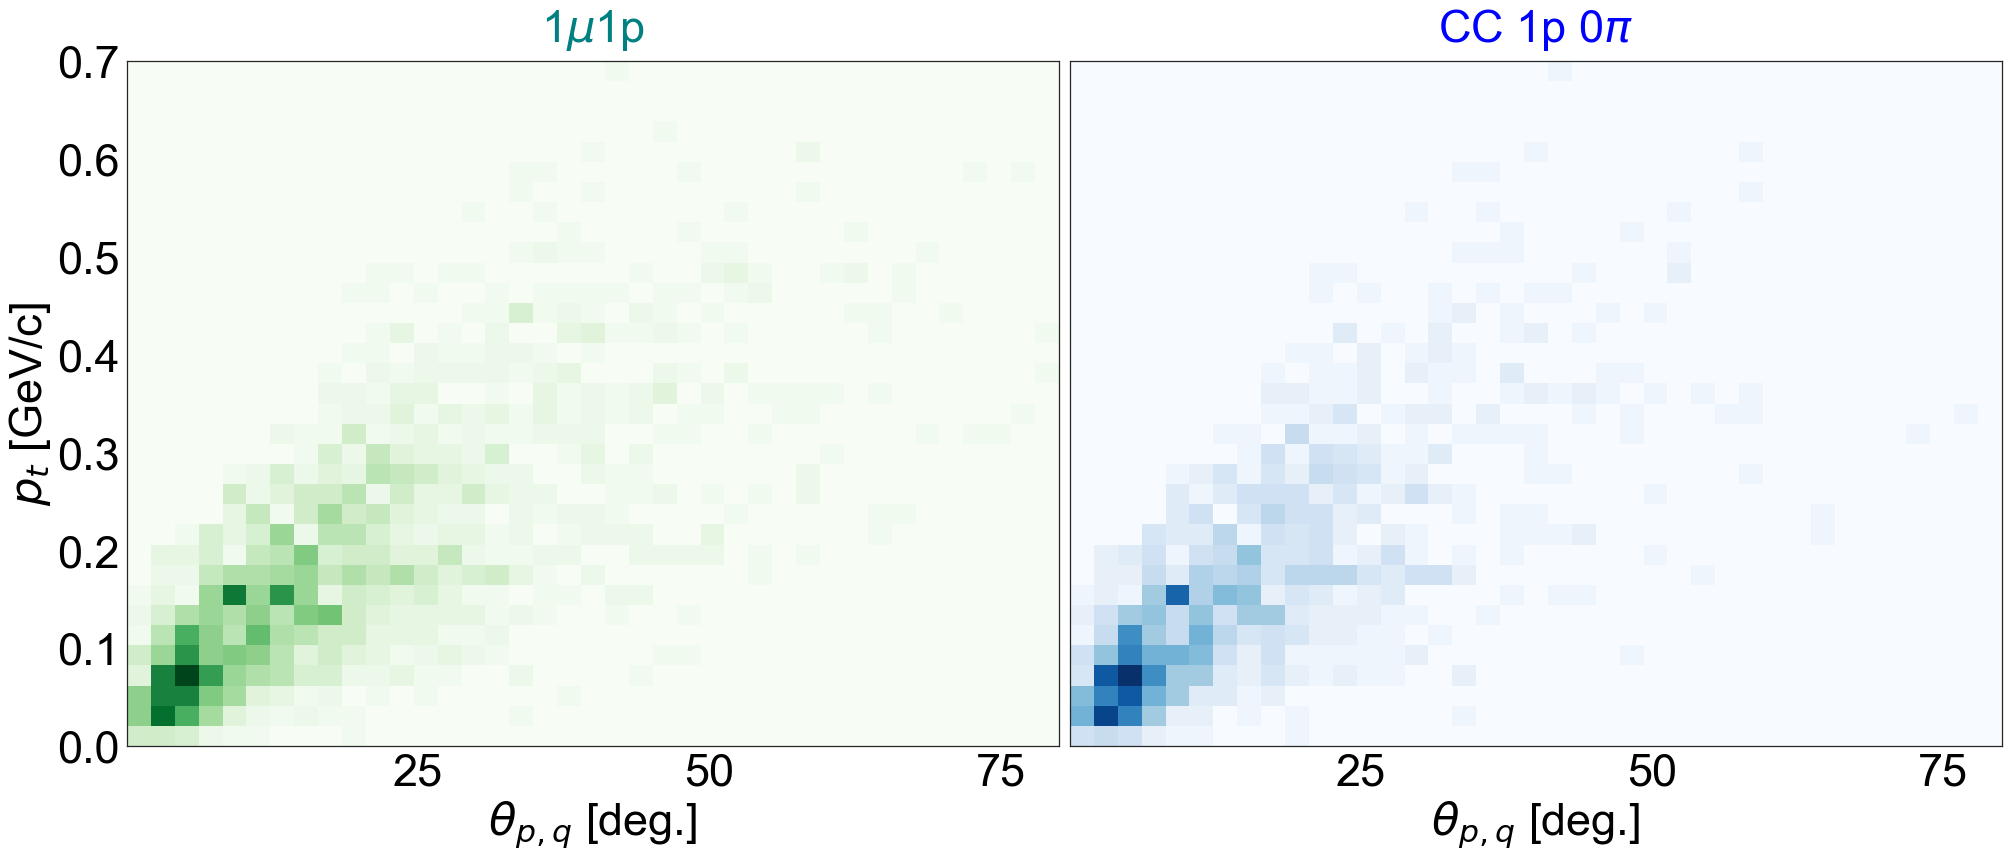

In [15]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq/theta_pq_vs_Pt.pdf')


fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq/theta_pq_vs_Pt_after_cut_DeltaPhi.pdf')